[0.10685884 0.09681871 0.08058806 0.11628929 0.07038816 0.13874597
 0.0672374  0.06934756 0.10710893 0.07474177 0.07187531]


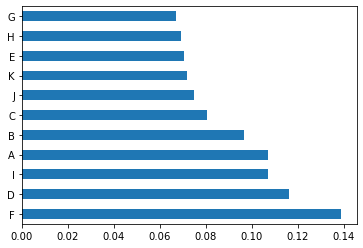

In [34]:
import pandas as pd
import numpy as np
df = pd.read_csv("Dragon.csv")
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [35]:
df.head()

,A,B,C,D,E,F,G,H,I,K,L,OUTPUT
0,2.871078,0.702344,0.582005,0.892594,35.860545,75.320097,3.161193,7.663964,5172.331754,4.780638,1.869624,0
1,2.046415,0.817459,0.460835,0.890817,48.466298,82.302837,3.412417,8.672161,6348.397332,3.042993,1.319186,0
2,1.627206,0.829892,0.467573,0.892619,45.044367,76.867407,3.656974,8.814623,5646.769388,3.318057,1.387250,0
3,0.665211,0.866678,0.309928,0.918354,36.776560,54.956953,4.178096,9.625368,2520.387260,3.423472,1.267793,0
4,2.622963,0.735477,0.329916,0.851532,51.809514,75.317493,3.848577,9.588471,5276.065990,2.464331,1.020398,0


In [36]:
y = df.iloc[:,11]
x = df.iloc[:,0:11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=8)
selector.fit(x_train, y_train)

SelectKBest(k=8)

In [38]:
selector.scores_


array([ 5.23102052, 23.53280924,  0.31250892, 30.91448093, 41.28363535,
       96.49488888,  1.68916322,  0.51146237, 55.29275189, 17.47728183,
       20.51952223])

In [39]:
cols = selector.get_support(indices=True)
cols

array([ 0,  1,  3,  4,  5,  8,  9, 10], dtype=int64)

In [40]:
x_train_s = x_train.iloc[:,cols]
x_test_s = x_test.iloc[:,cols]

In [41]:
from sklearn.tree import DecisionTreeClassifier
#Initalize the classifier
clf = DecisionTreeClassifier()
#Fitting the training data
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7363636363636363


In [43]:
clf.fit(x_train_s, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test_s)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5818181818181818
